In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\jojuk\Documents\git\projects\Capstone\data\SQLCountryInfoLatLong.csv")

In [3]:
df.head()

,Country,SumStudentsExchange,SumNIAdmissions,percentsetoniadmissions,Latitude,Longitude,Unnamed: 6
0,Afghanistan,1704,10160,17,34.983000,63.133300,NaN
1,Tuvalu,12,540,2,-8.516652,179.216647,NaN
2,Fiji,412,36631,1,-17.799600,177.416602,NaN
3,Kiribati,139,2661,5,1.338188,173.017571,NaN
4,Marshall Islands,0,656,0,7.103004,171.380000,NaN


In [4]:
#df.dropna(axis=1, how= 'all', inplace=False)
df.dropna(how='all', axis=1, inplace=True)

In [5]:
df

,Country,SumStudentsExchange,SumNIAdmissions,percentsetoniadmissions,Latitude,Longitude,Unnamed: 6
0,Afghanistan,1704,10160,17,34.983000,63.133300,NaN
1,Tuvalu,12,540,2,-8.516652,179.216647,NaN
2,Fiji,412,36631,1,-17.799600,177.416602,NaN
3,Kiribati,139,2661,5,1.338188,173.017571,NaN
4,Marshall Islands,0,656,0,7.103004,171.380000,NaN
...,...,...,...,...,...,...,...
183,Samoa,240,8265,3,-13.841545,-171.738642,NaN
184,Tonga,356,11446,3,-18.649574,-173.983293,NaN
185,United Kingdom,169544,15543693,1,54.000000,2.000000,NaN
186,Total,7631236,240486098,3,NaN,NaN,NaN


In [11]:
df['Longitude'].tolist()


[63.13329964,
 179.2166471,
 177.4166019,
 173.0175708,
 171.3800002,
 167.1766068,
 166.9315,
 158.1499743,
 156.8350158,
 151.3000048,
 143.7180037,
 134.4695009,
 133.9170865,
 127.6897147,
 125.7620047,
 125.5794559,
 123.3800036,
 121.2988889,
 114.9332841,
 106.2000006,
 106.1469997,
 104.5189986,
 103.8558207,
 100.4127778,
 100.1899987,
 98.50007524,
 97.96899665,
 97.20600363,
 89.92003048,
 89.51670065,
 82.18330255,
 81.23300155,
 75.28459306,
 73.81800065,
 73.49994747,
 70.10082678,
 69.00000365,
 63.49899651,
 59.45165767,
 57.97820756,
 57.51663367,
 56.27779455,
 55.55334265,
 55.44998979,
 51.59400361,
 51.53296789,
 50.58305172,
 50.16659135,
 47.99999756,
 46.96773907,
 45.8161111,
 45.57400265,
 44.78300151,
 44.3591667,
 43.2402441,
 43.00000263,
 42.72999101,
 42.37200058,
 39.725799,
 38.47699862,
 37.33329653,
 36.95100363,
 36.65749345,
 36.23329852,
 36.10500351,
 35.53329652,
 34.86670252,
 34.34998572,
 33.95001013,
 33.63599757,
 33.6,
 32.225,
 30.97003699

In [12]:
df['Latitude'].tolist()


[34.98300013,
 -8.516651999,
 -17.79959959,
 1.338187506,
 7.103004311,
 -15.51255573,
 0.5228,
 6.916643696,
 -8.09962319,
 -33.42004148,
 -5.490000005,
 7.345226355,
 34.67202964,
 36.93525067,
 38.50700411,
 -8.559388409,
 10.55037539,
 24.9575,
 4.883331115,
 50.24999712,
 11.32299911,
 11.4519961,
 1.293033466,
 20.2775,
 6.433001991,
 3.620359109,
 19.30100405,
 19.66500009,
 24.24997845,
 27.3833011,
 28.35000004,
 8.568999036,
 42.82987795,
 15.491997,
 4.16670819,
 33.89918276,
 39.75000301,
 49.62600011,
 42.4047101,
 23.3031887,
 -20.31619017,
 38.97553957,
 25.56527285,
 -4.616631654,
 30.65900412,
 25.28655601,
 26.23613629,
 -14.26617186,
 29.33334002,
 46.96773907,
 40.5655556,
 13.9789981,
 43.23300312,
 40.3016667,
 -11.7041577,
 36.86670013,
 42.24999086,
 11.10400201,
 -5.063463959,
 7.059996077,
 31.33330205,
 -0.41699699,
 15.11038129,
 32.28329707,
 32.62500014,
 33.83330406,
 31.91670012,
 11.77040428,
 -16.09954832,
 34.9170031,
 -11.9,
 -0.3088889,
 -17.5196166

In [13]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))


In [14]:
df['Coordinates'] = df['Coordinates'].apply(Point)


In [15]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')


In [16]:
print(gdf.head())


            Country  SumStudentsExchange  SumNIAdmissions  \
0       Afghanistan                 1704            10160   
1            Tuvalu                   12              540   
2              Fiji                  412            36631   
3          Kiribati                  139             2661   
4  Marshall Islands                    0              656   

   percentsetoniadmissions   Latitude   Longitude Unnamed: 6  \
0                       17  34.983000   63.133300        NaN   
1                        2  -8.516652  179.216647        NaN   
2                        1 -17.799600  177.416602        NaN   
3                        5   1.338188  173.017571        NaN   
4                        0   7.103004  171.380000        NaN   

                   Coordinates  
0    POINT (63.13330 34.98300)  
1   POINT (179.21665 -8.51665)  
2  POINT (177.41660 -17.79960)  
3    POINT (173.01757 1.33819)  
4    POINT (171.38000 7.10300)  


In [17]:
world = gpd.read_file('../data/world.json')

C:\Users\jojuk\Anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


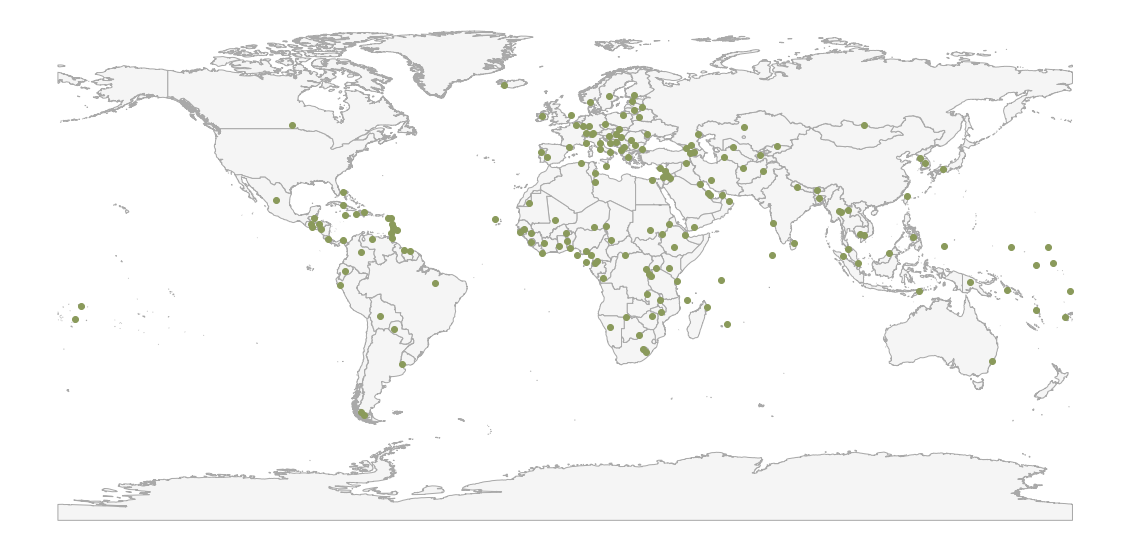

In [41]:
ax=world.plot(figsize=(20,16), color='whitesmoke', legend=True, column='percentsetoniadmissions', edgecolor='darkgray')#cmap='OrRd' 
ax.set_axis_off();
gdf.plot(ax=ax, color='#8A9A5B')

#ax.set_title("Countries of Origin for Students and Exchange Visas to U.S., 2017 to 2019")

plt.savefig('Countries of Origin.png')
plt.show()
